<a href="https://colab.research.google.com/github/ffactor1/deep-learning-projects/blob/main/Week_1_%E2%80%93_Deep_Learning_Skills_with_PyTorch(Transfer_Learning_with_ResNet18).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ffactor1/deep-learning-projects.git
%cd deep-learning-projects

Cloning into 'deep-learning-projects'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), done.
/content/deep-learning-projects


In [ ]:
import os

os.makedirs("image_classification", exist_ok=True)
os.makedirs("time_series_forecast", exist_ok=True)
os.makedirs("clinical_nlp", exist_ok=True)


In [ ]:
# STEP 1: Setup
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18
import matplotlib.pyplot as plt

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

# STEP 2: Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize(224),  # ResNet expects 224x224 input
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

# STEP 3: Load pretrained ResNet18
model = resnet18(pretrained=True)

# Replace final layer for 10 CIFAR classes
model.fc = nn.Linear(model.fc.in_features, 10)
model = model.to(device)

# STEP 4: Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# STEP 5: Training Loop
for epoch in range(5):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}")


Using: cuda


100%|██████████| 170M/170M [00:05<00:00, 29.6MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 192MB/s]


Epoch 1, Loss: 0.5519
Epoch 2, Loss: 0.3196
Epoch 3, Loss: 0.2245
Epoch 4, Loss: 0.1603
Epoch 5, Loss: 0.1229


In [ ]:
# STEP 7
# Evaluation
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")


Accuracy: 90.17%


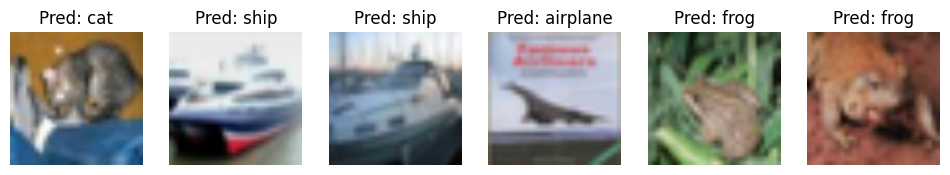

In [ ]:
# STEP 8
# View a few test images and predictions
classes = train_set.classes
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

outputs = model(images)
_, preds = torch.max(outputs, 1)

images = images.cpu()
preds = preds.cpu()

# Plot 6 predictions
fig, axes = plt.subplots(1, 6, figsize=(12, 3))
for i in range(6):
    img = images[i].permute(1, 2, 0) * 0.5 + 0.5  # unnormalize
    axes[i].imshow(img)
    axes[i].set_title(f"Pred: {classes[preds[i]]}")
    axes[i].axis('off')
plt.show()
